# Unit 5 - Financial Planning

In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [4]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
# Fetch current BTC price
btc_data = requests.get(btc_url)
btc_content = btc_data.json()
btc_value = btc_content["data"]["1"]["quotes"]["CAD"]["price"]

# Fetch current ETH price
eth_data = requests.get(eth_url)
eth_content = eth_data.json()
eth_value = eth_content["data"]["1027"]["quotes"]["CAD"]["price"]
# Compute current value of my crpto
my_btc_value = btc_value * my_btc
my_eth_value = eth_value * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $57977.14
The current value of your 5.3 ETH is $19166.82


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

In [27]:
# Format current date as ISO format
today = pd.Timestamp("2022-02-01" , tz = "Australia/Sydney").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers, 
    timeframe, 
    start = today, 
    end = today
).df
    
# Preview DataFrame
df_portfolio.head()

AGG                                      SPY  \
                             open    high    low   close    volume    open   
time                                                                         
2022-01-31 00:00:00-05:00  111.64  111.89  111.6  111.78  11437834  441.24   

                                                               
                             high     low    close     volume  
time                                                           
2022-01-31 00:00:00-05:00  450.28  439.81  449.815  128202383

In [13]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"].item()
spy_close_price = df_portfolio["SPY"]["close"].item()

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $111.78
Current SPY closing price: $449.815


In [14]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22490.75
The current value of your 200 AGG shares is $22356.00


### Savings Health Analysis

In [16]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_portfolio_dictionary = {'Amount': [my_btc_value+my_eth_value, my_spy_value+my_agg_value]}

# Create savings DataFrame
df_savings = pd.DataFrame(total_portfolio_dictionary,index=['Crypto','Shares'])

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,77143.957288
Shares,44846.750000


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

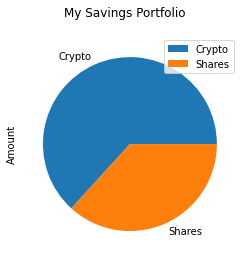

In [17]:
# Plot savings pie chart
df_savings.plot(kind = "pie", subplots = True, title = "My Savings Portfolio")

In [21]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum().item()
#total_savings

# Validate saving health
dollars_from_goal = emergency_fund - total_savings

if total_savings > emergency_fund:
    print("Congratulations, you have more then three months of income in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations you have reached your savings goal of three times your monthly income in your emergency fund.")
else:
    print(f'You are ${dollars_from_goal} away from reaching your savings goal of three months of income in your emergency fund.')

Congratulations, you have more then three months of income in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [28]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-02-01', tz="Australia/Sydney").isoformat()
end_date = pd.Timestamp('2022-02-01', tz="Australia/Sydney").isoformat()

In [29]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2018-02-12 00:00:00-05:00  106.74  106.9450  106.6632  106.77  5075086   
2018-02-13 00:00:00-05:00  106.79  106.9100  106.7000  106.83  3689890   
2018-02-14 00:00:00-05:00  106.57  106.6600  106.4039  106.46  3695997   
2018-02-15 00:00:00-05:00  106.55  106.7272  106.5300  106.59  2398428   
2018-02-16 00:00:00-05:00  106.85  106.8750  106.7100  106.81  3391074   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2018-02-12 00:00:00-05:00  263.87  267.01  261.88  265.26  99933794  
2018-02-13 00:00:00-05:00  263.94  266.62  263.31  266.01  56891150  
2018-02-14 00:00:00-05:00  264.47  270.00  263.97  269.71  86705860  
2018-02-15 00:00:00-05:00  271.59  273.01  268.77  273.00  72021939  
2018-02-16 00:00:00-05:00  272.31  275.32  272.27  273.09  76314679

In [31]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_thirty = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [33]:
# Printing the simulation input data
mc_thirty.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2018-02-12 00:00:00-05:00  106.74  106.9450  106.6632  106.77  5075086   
2018-02-13 00:00:00-05:00  106.79  106.9100  106.7000  106.83  3689890   
2018-02-14 00:00:00-05:00  106.57  106.6600  106.4039  106.46  3695997   
2018-02-15 00:00:00-05:00  106.55  106.7272  106.5300  106.59  2398428   
2018-02-16 00:00:00-05:00  106.85  106.8750  106.7100  106.81  3391074   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-02-12 00:00:00-05:00          NaN  263.87  267.01  261.88  265.26   
2018-02-13 00:00:00-05:00     0.000562  263.94  266.62  263.31  266.01   
2018-02-14 00:00:00-05:00    -0.003463  264.47  270.00  263.97  269.71   
2018-02-15 00:00:00-05:00     0.001221  271.59  273.01  268.77  273.00   
2018-02-16 00:00:00-05:00     0.002064  272.31  275.32  272.27  273.09   

                                                  
                             volume daily_return  
time                                              
2018-02-12 00:00:00-05:00  99933794          NaN  
2018-02-13 00:00:00-05:00  56891150     0.002827  
2018-02-14 00:00:00-05:00  86705860     0.013909  
2018-02-15 00:00:00-05:00  72021939     0.012198  
2018-02-16 00:00:00-05:00  76314679     0.000330

In [35]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_thirty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/coenemmenegger/Desktop/Jupyter-Workplace/API_HW_/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991286,0.979731,1.004390,0.992499,1.006421,1.004647,0.995310,1.002180,0.991913,1.008805,...,0.991141,1.008863,1.008505,1.005239,0.998736,0.995671,1.008468,0.999014,0.984530,0.987822
2,0.990568,0.976268,0.998877,0.985879,1.010747,1.030605,1.004277,1.000602,1.007128,1.018390,...,0.989516,1.011963,1.020377,0.997860,0.995163,1.005674,1.018856,1.010781,0.990652,0.982897
3,0.983418,0.974270,1.005735,0.983946,1.009011,1.031906,0.995784,1.008455,1.003027,1.006863,...,0.993364,1.006061,1.028063,1.007134,0.998764,1.002827,1.014332,1.004759,0.977394,0.982797
4,0.983466,0.965822,1.003579,0.984131,1.010949,1.036252,0.990161,1.028118,1.001174,0.991128,...,0.974327,1.000091,1.027966,1.001997,1.004821,1.015067,1.018983,1.003390,0.983752,1.001309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.333254,21.074897,18.312594,61.235862,8.974921,19.582358,17.876362,13.408343,20.119116,23.636823,...,10.533243,15.589857,44.073369,21.991893,15.580399,34.049195,12.794261,7.550450,51.991301,16.203096
7557,9.276661,20.986698,18.299613,60.758645,8.984518,19.516234,17.955283,13.600938,20.347358,23.910674,...,10.388596,15.665506,43.890439,22.051993,15.447936,34.164703,12.615449,7.484492,52.487526,16.080065
7558,9.288274,21.089034,18.390549,60.323675,8.956974,19.528256,18.001662,13.468490,20.376295,24.090128,...,10.360948,15.805424,43.649103,21.866004,15.387057,34.391209,12.661840,7.483133,52.423019,16.066518
7559,9.265990,20.933374,18.313577,60.640253,9.015941,19.358244,17.938417,13.741977,20.188803,24.108954,...,10.387608,15.668667,43.813913,21.475414,15.100203,34.496774,12.412803,7.544374,52.524687,15.975100


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

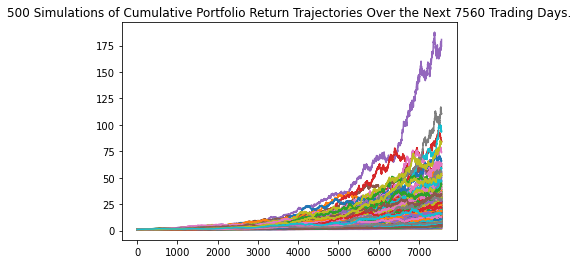

In [37]:
# Plot simulation outcomes
sim_plot = mc_thirty.plot_simulation()
sim_plot

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

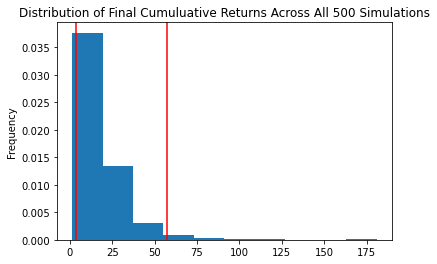

In [39]:
# Plot probability distribution and confidence intervals
dist_plot = mc_thirty.plot_distribution()
dist_plot

### Retirement Analysis

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_cumulative_return = mc_thirty.summarize_cumulative_return()

# Print summary statistics
sum_cumulative_return

count           500.000000
mean             18.527130
std              15.743592
min               1.373517
25%               9.048536
50%              14.492546
75%              22.718641
max             180.845605
95% CI Lower      3.680083
95% CI Upper     57.395367
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [42]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_upper = round(sum_cumulative_return[8]*initial_investment,2)
ci_lower = round(sum_cumulative_return[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $1147907.34 and $73601.66


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [43]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_upper = round(sum_cumulative_return[8]*initial_investment,2)
ci_lower = round(sum_cumulative_return[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $1721861.01 and $110402.49
